In [11]:
import skimage
import skimage.io

class MyPic():
  def __init__(self,filename):
    self.pic = skimage.io.imread(skimage.data.data_dir + "/" + filename)
  
  def threshold(self,p):
    if p > 255:
      return 255
    else:
      return int(p)
  
  def show(self):
    skimage.io.imshow(self.pic)
  
  def sum(self):
    (width,height,channel) = self.pic.shape
    p = [0 for i in range(channel)]
    for x in range(width):
      for y in range(height):
        for c in range(channel):
          p[c] += self.pic[x,y,c]
    return tuple(p)

  def bluered(self):
    (height,width,channel) = self.pic.shape
    mid = height // 2
    for col in range(width):
      for row in range(height):
        if row <= mid:
          self.pic[row, col, 2] = 255
        else:
          self.pic[row, col, 0] = 255

  def red_circle(self, center_x, center_y, radius):
    (height,width,_) = self.pic.shape
    for col in range(width):
      for row in range(height):
        if (row - center_x)**2 + (col - center_y)**2 < radius**2:
          self.pic[row, col, 0] = 255
  
  def grey(self):
    (height,width,channel) = self.pic.shape
    # This algorithm assumes RGB. If the number of channels is
    # smaller than 3, it must be an error and raise an Exception.
    if channel < 3:
      raise Exception()
    
    for row in range(height):
      for col in range(width):
        grey = 0
        for c in range(3):
            grey += self.pic[row,col,c]
        
        grey = grey / channel
        for c in range(3):
          self.pic[row,col,c] = grey

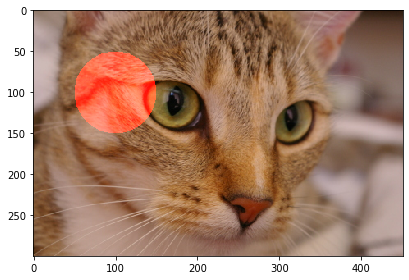

In [12]:
pic = MyPic("chelsea.png")
pic.red_circle(100,100,50)
pic.show()